# Automatically Clustering User Walking Activity Data from Android Accelerometer data
In Chapter 8 of the book, we learn a few handy techniques. We learn about clustering, and how it fits a model without knowing the features we are trying to extract. Different from classification, we don't know ahead of time the number of classes and/or features. Specifically, the book teaches us about clustering using K-means, and also using Self Organizing Map (SOM). In K-means, we tell the clustering algorithm K, for K clusters, or K classes, and the algorithm automatically clusters the data into these classes. We first try the algorithm out after using a Fourier Transformation to convert audio WAV file signals into discrete pitch classes, and a histogram of counts of pitches per time period. Then, K-means is used to classify 5 sound files about coughing, and screaming into 2 distinct classes based on their pitches. Later in Chapter 8, we learn about how to do segmentation on a single audio file. Segmentation is about taking a single file, and splitting it up into sampling segments (we use 50 on the audio file, a podcast, I also reuse 50 in this assignment, works fine). Then, we can classify the audio segments into different speakers, speaking at specific times. The final task is to learn about Self Organizing Map, and then to use it in a 4 x 4 x 3 (dim) grid to automatically cluster some color data into 4 quadrants. 

The final chapter assignment is to look at [User Identification from Walking Activity Dataset from the UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/User+Identification+From+Walking+Activity#). The dataset has 22 participants in a CSV format. Each file has 1000s of samples of (time, Xpos, Ypos, Zpos). To get an idea of the dimensionality and what the data looks like, I found a great link with this figure below:

![Android Position Model](../figs/android_pos_model.png)

The dataset was pretty interesting. The first challenge, according to the book is to calculate a histogram of differences in magnitude of the XPos, YPos, ZPos tuple, which it defines as _jerk_. I found a handful of ways to calculate jerk, which is &quot;the 3'rd derivative of position with respect to time, which is the change in acceleration per unit time&quot;, but the easiest way I found was at this [Stack Overflow Post](https://stackoverflow.com/questions/25703792/find-the-shape-of-a-list-of-numbers-straight-line-concave-convex-how-many-hu) which gives this code snippet:

```python
import numpy as np

data = [1, 2, 4, 5, 8, 7, 6, 4, 1]
data = np.array(data, dtype=float)
velocity = np.diff(data)
acceleration = np.diff(velocity)
jerk = np.diff(acceleration)
jounce = np.diff(jerk)

print data
print velocity
print acceleration
print jerk
print jounce

>>>
[ 1.  2.  4.  5.  8.  7.  6.  4.  1.]

# positive numbers = rising
[ 1.  2.  1.  3. -1. -1. -2. -3.]

# positive numbers = concave up
[ 1. -1.  2. -4.  0. -1. -1.]

# positive numbers = curling up
[-2.  3. -6.  4. -1.  0.]

# positive numbers = snapping up
[  5.  -9.  10.  -5.   1.]
```

I use that in my own code. I had to go look up what [numpy.diff](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html) did, which is exactly what you would expect it calculates a[n+1] - a[n] for all n in the dataset which is basically how to compute each derivative, velocity, acceleration, and jerk (and jounce, but I didn't use that). 

After I could compute jerk, the next hardest part was just binning the histograms computed by finding jerk. Here, looking at the data made a big difference. For example if you look at the charts titled [Normalized Jerk Magnitude...](#normalized_jerk_mag) below, you will see something pop out at you. Basically the thing that pops out is that the XYZ at each magnitude has a dominant axis value, similar to in the book where they pick the most dominant frequency per time interval. Here, instead of just the dimension of the most dominant axis (recall, in the book, the dimensions are the Pitches themselves, and simply counting the pitches creates a useful fingerprint), we take the highest magnitude value. To compute that, we use the [tf.reduce_max](https://www.tensorflow.org/api_docs/python/tf/math/reduce_max), along the 1st axis, we get the actual max_jerk magnitude per dimension which is what we want. 

With the histogram fingerprint per participant, we have a dataset that we can compare against one another, for the summation of their activity. I did K-means clustering then with k=2, and saw a good sampling of [2 distinct clusters](#2k_clusters) among the 22 participants studied. After that, I moved onto to segmentation, and just picked the first participant from the list (11.csv), and then divided up his point samples into 50 sample segments. Then I clustered those. Worked pretty well, since after reading the [Personalization and user verification in wearable systems using biometric walking patterns](https://www.researchgate.net/publication/227192676_Personalization_and_user_verification_in_wearable_systems_using_biometric_walking_patterns) paper that this dataset is based on, it mentions 5 classes of activites, ``Climbing Stairs, Standing, Walking, Talking, Working``. You can see the [5 distinct clusters](#5k_clusters) and the K-means clustering fitting the model pretty well (not sure which label is which, that's for further research!). Finally, I tried out the Self Organizing Map, using a simple 4x4x3 grid as used in the book. Results look decent, with 2 distinct color/clusters forming in the final plot. 

A very interesting chapter and exercise and dataset! Now, some useful references.

## References

   1. [Using K-means Clustering with Tensorflow](https://www.altoros.com/blog/using-k-means-clustering-in-tensorflow/) - useful refernce shows how to plot the K-means results.
   2. [Multi-column legends in Matplotlib](https://matplotlib.org/1.3.1/users/legend_guide.html#multicolumn-legend) - I needed ths to show the participant histogram b/c there was so many and to not have it overlap or run off the chart.
   3. [User Activing from Walking Dataset - UCI](https://archive.ics.uci.edu/ml/datasets/User+Identification+From+Walking+Activity#) - the main dataset used in the notebook and this final project.
   4. [Self Organizing Map on Wikipedia](https://en.wikipedia.org/wiki/Self-organizing_map) - was necessary to understand some of the math especially in the assignment step. Has cool animated GIF of an SOM in action.
   5. [Dealing with Matplotlib N-D errors](https://stackoverflow.com/questions/44224076/python-3-scatter-plot-gives-valueerror-masked-arrays-must-be-1-d-even-though) - I ran into these when trying to plot my K-means. You need to wrap the dataset in a `[` and `]`.
   6. [How to compute Jerk in Python/Numpy](https://stackoverflow.com/questions/25703792/find-the-shape-of-a-list-of-numbers-straight-line-concave-convex-how-many-hu) - Probably the most useful link I ran into, shows how to compute jerk in Python using Numpy. Easy.
   7. [Discerning different movements in Android data](https://stackoverflow.com/questions/7152433/detect-specific-shaking-movement-illustrated-d) - The examples are not in Python, but general thoughts about how to compute jerk and what it means when magnitudes shift.
   8. [How an Accelerometer Works](https://learn.sparkfun.com/tutorials/accelerometer-basics/all) - Just useful information about accelerometers. Read this when I was stuck trying to understand the data.
   9. [Measure data with an Accelerometer - MathWorks](https://www.mathworks.com/help/supportpkg/android/ref/accelerometer.html) - had the super useful graphic I borrowed and cited above. 
   10. [Identifying steps or walking in an accelerometer](https://dsp.stackexchange.com/questions/32145/identifying-steps-in-walking-accelerometer) - Useful post on how to discern what is going on in accelerometer data.
   11. [Physics of calculating jerk](https://physics.stackexchange.com/questions/431595/how-to-calculate-the-jerk-from-acceleration-data) - Extremely useful and simple theory / knowledge about jerk. 
   12. [Useful Pandas Examples for reading CSVs](https://stackoverflow.com/questions/34091877/how-to-add-header-row-to-a-pandas-dataframe) - Because I always forget. 

In [1]:
import sys

In [2]:
sys.path.append("../libs/basic_units/")

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from basic_units import cm, inch

In [4]:
k = 2
max_iterations = 100

In [5]:
filenames = tf.train.match_filenames_once('../data/User Identification From Walking Activity/*.csv')
count_num_files = tf.size(filenames)
filename_queue = tf.train.string_input_producer(filenames)
reader = tf.WholeFileReader()
filename, file_contents = reader.read(filename_queue)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Queue-bas

In [6]:
jerk = tf.placeholder(tf.float32)
max_jerk = tf.reduce_max(jerk, keepdims=True, axis=1)
accel_files = []

In [7]:
def initial_cluster_centroids(X, k):
    return X[0:k, :]

In [8]:
def assign_cluster(X, centroids):
    expanded_vectors = tf.expand_dims(X, 0) # 1, 5, 12
    expanded_centroids = tf.expand_dims(centroids, 1) #2, 1, 12
    distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2) #2, 5
    mins = tf.argmin(distances, 0)
    return mins

In [9]:
def recompute_centroids(X, Y):
    sums = tf.unsorted_segment_sum(X, Y, k)
    counts = tf.unsorted_segment_sum(tf.ones_like(X), Y, k)
    return sums / counts

In [10]:
def extract_feature_vector(sess, x):
    x_s = x[:, 1:] # we don't need the time variable
    
    # compute velocity (v_X), acceleration (a_X) and jerk (j_X)
    v_X = np.diff(x_s, axis=0) # velocity
    a_X = np.diff(v_X, axis=0) # acceleration
    j_X = np.diff(a_X, axis=0) # jerk   
    
    X = j_X
    mJerk = sess.run(max_jerk, feed_dict = {jerk: X})
    num_samples, num_features = np.shape(X)
    hist, bins = np.histogram(mJerk, bins=range(num_features + 1))
    return hist.astype(float) / num_samples

In [11]:
def get_dataset(sess):
    sess.run(tf.local_variables_initializer()) 
    num_files = sess.run(count_num_files)

    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    xs = []
    for i in range(num_files):
        accel_file = sess.run(filename)
        accel_file_frame = pd.read_csv(accel_file, header=None, sep=',', 
                  names = ["Time", "XPos", "YPos", "ZPos"])
        accel_files.append(accel_file_frame)
        print(accel_file)        
        x = [extract_feature_vector(sess, accel_file_frame.values)]
        x = np.matrix(x)

        if len(xs) == 0:
            xs = x
        else:
            xs = np.vstack((xs, x))
    return xs    

In [12]:
groups = None
with tf.Session() as sess:
    X = get_dataset(sess)
    centroids = initial_cluster_centroids(X, k)
    i, converged = 0, False
    while not converged and i < max_iterations:
        i += 1
        Y = assign_cluster(X, centroids)
        centroids = sess.run(recompute_centroids(X, Y))
    print(centroids)   
    groups = Y.eval()
    print(groups)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
../data/User Identification From Walking Activity/1.csv
../data/User Identification From Walking Activity/3.csv
../data/User Identification From Walking Activity/18.csv
../data/User Identification From Walking Activity/16.csv
../data/User Identification From Walking Activity/4.csv
../data/User Identification From Walking Activity/19.csv
../data/User Identification From Walking Activity/17.csv
../data/User Identification From Walking Activity/15.csv
../data/User Identification From Walking Activity/5.csv
../data/User Identification From Walking Activity/11.csv
../data/User Identification From Walking Activity/2.csv
../data/User Identification From Walking Activity/13.csv
../data/User Identification From Walking Activity/8.csv
../data/User Identification From Walking Activity/14.csv
../data/User Identification From Walking Activity/7.csv
../data/User Identification From Walking Activity/12.csv
../data/User

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Enqueue operation was cancelled
	 [[{{node input_producer/input_producer_EnqueueMany}}]]


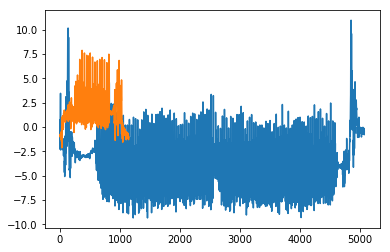

In [13]:
accel_files[0]["XPos"].plot.line()
accel_files[1]["XPos"].plot.line()

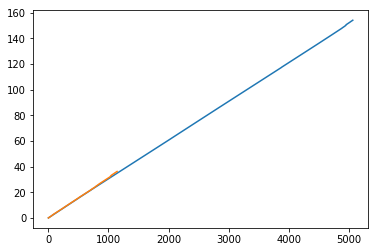

In [14]:
accel_files[0]["Time"].plot.line()
accel_files[1]["Time"].plot.line()

In [15]:
num_pts = [len(a_f) for a_f in accel_files]

(array([4., 9., 3., 1., 1., 1., 0., 1., 0., 2.]),
 array([  911.,  3019.,  5127.,  7235.,  9343., 11451., 13559., 15667.,
        17775., 19883., 21991.]),
 <a list of 10 Patch objects>)

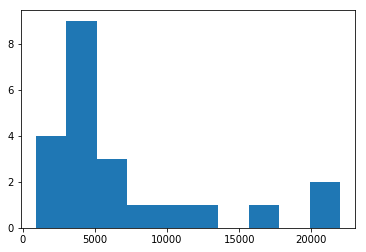

In [16]:
plt.hist(num_pts) # the distribution of the sample density for all the participant data 

In [17]:
print(X.shape)
print(X)
num_samples, num_features = X.shape

(22, 3)
[[0.33636005 0.24161074 0.1547572 ]
 [0.61612621 0.16564417 0.05959684]
 [0.36757408 0.22447603 0.12690918]
 [0.39536232 0.21391304 0.10550725]
 [0.39266265 0.1996274  0.11708226]
 [0.49008811 0.1530837  0.0561674 ]
 [0.41604512 0.20379298 0.09982718]
 [0.47972603 0.21178082 0.09808219]
 [0.56039076 0.11900533 0.08348135]
 [0.39552636 0.24391976 0.10917806]
 [0.63598866 0.15931941 0.05413766]
 [0.44086022 0.26896655 0.1166368 ]
 [0.46178344 0.19166184 0.09988419]
 [0.66450432 0.11976048 0.042831  ]
 [0.37251744 0.27160494 0.14143854]
 [0.42764804 0.21080067 0.11134279]
 [0.42387999 0.2769106  0.11899453]
 [0.65151023 0.14225398 0.04871712]
 [0.35387609 0.30003244 0.15244891]
 [0.56981841 0.18960551 0.07313713]
 [0.36309454 0.24111885 0.11873008]
 [0.45136668 0.24435276 0.10232078]]


([array([ 0., 13.,  9.]), array([18.,  4.,  0.]), array([22.,  0.,  0.])],
 array([0.042831  , 0.25005544, 0.45727988, 0.66450432]),
 <a list of 3 Lists of Patches objects>)

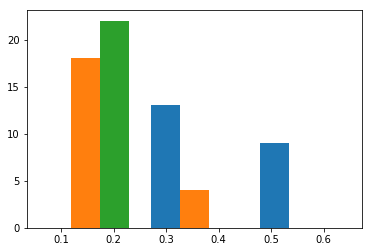

In [18]:
plt.hist(X, num_features, histtype='bar')

In [19]:
print(X[0].shape)

(1, 3)


In [20]:
print(X[0])
print(np.random.rand(3, 1).flatten())

[[0.33636005 0.24161074 0.1547572 ]]
[0.07417097 0.55428624 0.41558062]


[6.81818182e-04 1.00068182e+00 2.00068182e+00]


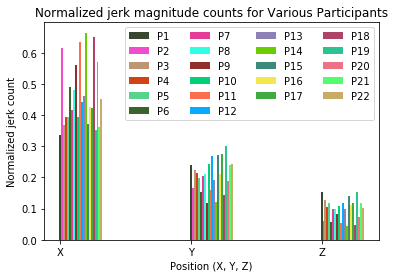

In [21]:
labels=['X', 'Y', 'Z']
fig, ax = plt.subplots()
ind = np.arange(len(labels))
width = 0.015 
plots = []
colors = [np.random.rand(3,1).flatten() for i in range(num_samples)]

for i in range(num_samples):
    Xs = np.asarray(X[i]).reshape(-1)
    p = ax.bar(ind + i*width, Xs, width, color=colors[i])
    plots.append(p[0])

xticks = ind + width / (num_samples)
print(xticks)
ax.legend(tuple(plots), tuple(['P'+str(i+1) for i in range(num_samples)]), ncol=4)
ax.yaxis.set_units(inch)
ax.autoscale_view()
ax.set_xticks(xticks)
ax.set_xticklabels(labels)

ax.set_ylabel('Normalized jerk count')
ax.set_xlabel('Position (X, Y, Z)')
ax.set_title('Normalized jerk magnitude counts for Various Participants')
plt.show()

[0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0]
[[0.33636005 0.24161074 0.1547572 ]]


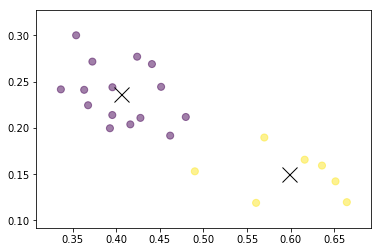

In [22]:
print(groups)
print(X[0, :].flatten().reshape(-1)[:])
plt.scatter([X[:, 0]], [X[:, 1]], c=groups, s=50, alpha=0.5)
plt.plot([centroids[:, 0]], [centroids[:, 1]], 'kx', markersize=15)
plt.show()

<a name="2k_clusters"></a>

# Segmentation
Now we will try out segmentation as described in the book. Instead of treating each individual participant file as a whole, segmentation takes one file, and splits it into N segments. 

In [23]:
segment_size = 50
k = 5 # Climbing Stairs, Standing, Walking, Talking, Working from the paper

In [24]:
def get_accel_data(accel_file):
    accel_file_frame = pd.read_csv(accel_file, header=None, sep=',', 
                  names = ["Time", "XPos", "YPos", "ZPos"])
    return accel_file_frame.values

In [25]:
def get_dataset_segmented(sess, accel_file):
    accel_data = get_accel_data(accel_file)
    print('accel_data', np.shape(accel_data))
    accel_length = np.shape(accel_data)[0]
    print('accel_length', accel_length)
    xs = []
    
    for i in range(accel_length / segment_size):
        accel_segment = accel_data[i*segment_size:(i+1)*segment_size, :]
        x = extract_feature_vector(sess, accel_segment)
        x = np.matrix(x)

        if len(xs) == 0:
            xs = x
        else:
            xs = np.vstack((xs, x))
    return accel_data, xs   

In [26]:
print(k)

5


In [28]:
with tf.Session() as sess:
    tf.global_variables_initializer()
    accel_data, X1 = get_dataset_segmented(sess, "../data/User Identification From Walking Activity/11.csv")

    centroids = initial_cluster_centroids(X1, k)
    i, converged = 0, False
    while not converged and i < max_iterations:
        i += 1
        Y1 = assign_cluster(X1, centroids)
        centroids = sess.run(recompute_centroids(X1, Y1))
        if i % 50 == 0:
            print('iteration', i)
    segments = sess.run(Y1)
    print('Num segments ', str(len(segments)))
    for i in range(len(segments)):
        #seconds = (i * segment_size) / float(10)
        seconds = accel_data[(i * segment_size)][0]
        min, sec = divmod(seconds, 60)
        time_str = '{}m {}s'.format(min, sec)
        print(time_str, segments[i])

('accel_data', (5636, 4))
('accel_length', 5636)
('iteration', 50)
('iteration', 100)
('Num segments ', '112')
('0.0m 0.0s', 2)
('0.0m 1.6802s', 2)
('0.0m 3.2303s', 3)
('0.0m 4.7304s', 3)
('0.0m 6.2403s', 2)
('0.0m 7.7403s', 1)
('0.0m 9.2401s', 1)
('0.0m 10.78s', 1)
('0.0m 12.37s', 1)
('0.0m 13.87s', 0)
('0.0m 15.37s', 0)
('0.0m 16.89s', 4)
('0.0m 18.39s', 4)
('0.0m 19.89s', 0)
('0.0m 21.39s', 0)
('0.0m 22.89s', 0)
('0.0m 24.401s', 4)
('0.0m 25.96s', 0)
('0.0m 27.47s', 1)
('0.0m 28.98s', 0)
('0.0m 30.48s', 0)
('0.0m 31.98s', 0)
('0.0m 33.611s', 0)
('0.0m 35.161s', 4)
('0.0m 37.108s', 0)
('0.0m 38.8s', 4)
('0.0m 40.36s', 0)
('0.0m 41.87s', 0)
('0.0m 43.37s', 0)
('0.0m 45.02s', 0)
('0.0m 46.69s', 0)
('0.0m 48.19s', 0)
('0.0m 49.82s', 0)
('0.0m 51.34s', 0)
('0.0m 52.84s', 4)
('0.0m 54.46s', 0)
('0.0m 56.06s', 4)
('0.0m 57.56s', 0)
('0.0m 59.06s', 4)
('1.0m 0.56s', 4)
('1.0m 2.1s', 0)
('1.0m 3.68s', 0)
('1.0m 5.19s', 4)
('1.0m 6.69s', 4)
('1.0m 8.19s', 4)
('1.0m 9.73s', 4)
('1.0m 11.24s', 

[2 2 3 3 2 1 1 1 1 0 0 4 4 0 0 0 4 0 1 0 0 0 0 4 0 4 0 0 0 0 0 0 0 0 4 0 4
 0 4 4 0 0 4 4 4 4 4 0 4 0 0 4 0 2 4 0 4 2 0 4 4 0 4 4 4 0 0 0 4 4 4 4 4 4
 0 4 4 0 0 4 4 0 4 4 0 0 4 0 4 4 4 4 2 2 0 0 0 4 4 4 0 4 4 0 0 2 2 1 1 1 0
 1]


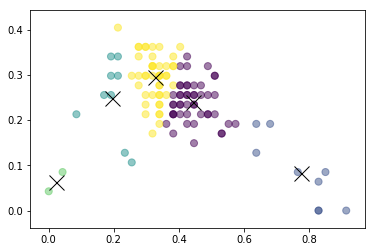

In [29]:
print(segments)
plt.scatter([X1[:, 0]], [X1[:, 1]], c=segments, s=50, alpha=0.5)
plt.plot([centroids[:, 0]], [centroids[:, 1]], 'kx', markersize=15)
plt.show()

# Try the Self Organizing Map
To try the self organizing map from the book, we need to come up with a dimensional grid and let the SOM automatically discern the classes on its own. We'll use a 4 x 4 grid, with our 3 dimensional X vector of participants.

In [30]:
class SOM:
    
    def __init__(self, width, height, dim):
        self.num_iters = 100
        self.width = width
        self.height = height
        self.dim = dim
        self.node_locs = self.get_locs()
        nodes = tf.Variable(tf.random_normal([width*height, dim]))
        self.nodes = nodes
        x = tf.placeholder(tf.float32, [dim]) 
        self.x = x 
        iter = tf.placeholder(tf.float32)
        self.iter = iter 
        bmu_loc = self.get_bmu_loc(x)
        self.propagate_nodes = self.get_propagation(bmu_loc, x, iter)
        
    def get_propagation(self, bmu_loc, x, iter):
        num_nodes = self.width * self.height
        rate = 1.0 - tf.div(iter, self.num_iters)
        alpha = rate * 0.5
        sigma = rate * tf.to_float(tf.maximum(self.width, self.height)) / 2.
        expanded_bmu_loc = tf.expand_dims(tf.to_float(bmu_loc), 0)
        sqr_dists_from_bmu = tf.reduce_sum(
          tf.square(tf.subtract(expanded_bmu_loc, self.node_locs)), 1)
        neigh_factor = tf.exp(-tf.div(sqr_dists_from_bmu, 2 * tf.square(sigma)))
        rate = tf.multiply(alpha, neigh_factor)
        rate_factor = tf.stack([tf.tile(tf.slice(rate, [i], [1]), [self.dim]) for i in range(num_nodes)])
        nodes_diff = tf.multiply(rate_factor, tf.subtract(tf.stack([x for i in range(num_nodes)]), self.nodes))
        update_nodes = tf.add(self.nodes, nodes_diff)
        return tf.assign(self.nodes, update_nodes)
    
    def get_bmu_loc(self, x):
        expanded_x = tf.expand_dims(x, 0)
        sqr_diff = tf.square(tf.subtract(expanded_x, self.nodes))
        dists = tf.reduce_sum(sqr_diff, 1)
        bmu_idx = tf.argmin(dists, 0)
        bmu_loc = tf.stack([tf.mod(bmu_idx, self.width), tf.div(bmu_idx, self.width)])
        return bmu_loc
    
    def get_locs(self):
        locs = [[x, y]
                 for y in range(self.height)
                 for x in range(self.width)]
        return tf.to_float(locs)

    def train(self, data):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for i in range(self.num_iters):
                for data_x in data:
                    sess.run(self.propagate_nodes, feed_dict={self.x: data_x, self.iter: i})
            centroid_grid = [[] for i in range(self.width)]
            self.nodes_val = list(sess.run(self.nodes))
            self.locs_val = list(sess.run(self.node_locs))
            for i, l in enumerate(self.locs_val):
                centroid_grid[int(l[0])].append(self.nodes_val[i])
            self.centroid_grid = centroid_grid


In [31]:
print(np.array(X))
print(X.shape)

[[0.33636005 0.24161074 0.1547572 ]
 [0.61612621 0.16564417 0.05959684]
 [0.36757408 0.22447603 0.12690918]
 [0.39536232 0.21391304 0.10550725]
 [0.39266265 0.1996274  0.11708226]
 [0.49008811 0.1530837  0.0561674 ]
 [0.41604512 0.20379298 0.09982718]
 [0.47972603 0.21178082 0.09808219]
 [0.56039076 0.11900533 0.08348135]
 [0.39552636 0.24391976 0.10917806]
 [0.63598866 0.15931941 0.05413766]
 [0.44086022 0.26896655 0.1166368 ]
 [0.46178344 0.19166184 0.09988419]
 [0.66450432 0.11976048 0.042831  ]
 [0.37251744 0.27160494 0.14143854]
 [0.42764804 0.21080067 0.11134279]
 [0.42387999 0.2769106  0.11899453]
 [0.65151023 0.14225398 0.04871712]
 [0.35387609 0.30003244 0.15244891]
 [0.56981841 0.18960551 0.07313713]
 [0.36309454 0.24111885 0.11873008]
 [0.45136668 0.24435276 0.10232078]]
(22, 3)


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


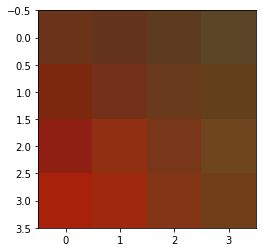

In [32]:
som = SOM(4, 4, 3)
som.train(np.array(X))
plt.imshow(som.centroid_grid)
plt.show()